# Práctica Machine Learning
## Tarea
Es un problema de regresión: teneís que predecir el precio del airbnb utilizando los datos disponibles. Se valorará:
- Generación de nuevas características a partir de las existentes.
- Codificación de variables.
Análisis exploratorio.
- Selección y evaluación del modelo.
- Comparativa de distintos algoritmos.

In [255]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None) # para mostrar todas las filas
pd.set_option('display.max_columns', None) # para mostrar todas las columnas

##Análisis exploratorio y limpieza de datos

In [256]:
# Dataset: https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&q=Madrid&timezone=Europe/Berlin&lang=en&use_labels_for_header=true&csv_separator=%3B
# Descargamos el dataset
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&q=Madrid&timezone=Europe/Berlin&lang=en&use_labels_for_header=true&csv_separator=%3B"

--2021-07-01 17:58:43--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&q=Madrid&timezone=Europe/Berlin&lang=en&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [             <=>    ]  57.57M  2.75MB/s    in 21s     

2021-07-01 17:59:06 (2.80 MB/s) - ‘airbnb-listings.csv’ saved [60363700]



In [257]:
# Primero vamos a mirar que tiene el extracto
df = pd.read_csv('airbnb-listings.csv', sep=';', decimal='.')
df.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,14712301,https://www.airbnb.com/rooms/14712301,20170304065726,2017-03-04,Cozy Studio between Earls Court and Gloucester Rd,Located 1 minute away from Earls Court. It is ...,NaN,Located 1 minute away from Earls Court. It is ...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://public.opendatasoft.com/api/v2/catalog...,NaN,7232618,https://www.airbnb.com/users/show/7232618,Iñigo,2013-07-02,"Madrid, Community of Madrid, Spain","Spanish, I love sports.",within a few hours,100.0,NaN,https://a0.muscache.com/im/users/7232618/profi...,https://a0.muscache.com/im/users/7232618/profi...,NaN,1.0,1.0,"email,phone,reviews,jumio,government_id","Bramham Gardens, London, England SW5 0HG, Unit...",NaN,Kensington and Chelsea,NaN,London,England,SW5 0HG,London,"London, United Kingdom",GB,United Kingdom,51.492474,-0.188628,Apartment,Entire home/apt,1,1.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Heat...",NaN,50.0,NaN,NaN,100.0,30.0,1,20,5,49,3 months ago,NaN,3,16,16,169,2017-03-04,2,2016-09-09,2016-09-29,90.0,10.0,10.0,9.0,9.0,9.0,10.0,NaN,NaN,strict,1.0,0.34,"51.4924740202,-0.188628400994","Host Has Profile Pic,Host Identity Verified"
1,12884849,https://www.airbnb.com/rooms/12884849,20170304065726,2017-03-05,Five bedroom house in Barnes,Lovely and spacious Edwardian house located on...,The house is spacious with approx 225 sq. of l...,Lovely and spacious Edwardian house located on...,none,Quiet residential street,NaN,The house is located three minutes walk from t...,"Guests will have access to all rooms, as desir...",We will be away but will make ourselves availa...,NaN,https://a0.muscache.com/im/pictures/9b3adacb-1...,https://a0.muscache.com/im/pictures/9b3adacb-1...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/9b3adacb-1...,19959228,https://www.airbnb.com/users/show/19959228,Susanna,2014-08-13,GB,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/76a0b9a0-9...,https://a0.muscache.com/im/pictures/76a0b9a0-9...,Westbourne Green,2.0,2.0,"email,phone,reviews","Madrid Road, London, SW13 9PG, United Kingdom",LB of Richmond upon Thames,Richmond upon Thames,NaN,London,NaN,SW13 9PG,London,"London, United Kingdom",GB,United Kingdom,51.482005,-0.239277,House,Entire home/apt,8,2.5,5.0,5.0,Real Bed,"TV,Wireless Internet,Kitchen,Heating,Family/ki...",NaN,175.0,NaN,NaN,750.0,100.0,6,25,1,1125,8 months ago,NaN,0,0,0,0,2017-03-05,6,2016-07-11,2016-08-07,87.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.76,"51.4820046166,-0.23927746504","Host Has Profile Pic,Is Location Exact"
2,17524980,https://www.airbnb.com/rooms/17524980,20170304065726,2017-03-05,"Modern & Bright, Central Soho, 1 Bedroom Apart...",A nice compact one bedroom apartment that has ...,One Bedroom A

In [258]:
# Miramos las columnas que contiene el csv de manera general para tener una perspectiva de como es el dataset
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [259]:
from sklearn.model_selection import train_test_split

# Dividimos el dataset entre training y test, lo mezclamos y guardamos los resultados respectivos en un csv
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=0)
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

In [260]:
# Cogemos el dataset de train
df_train = pd.read_csv('./train.csv', sep=';', decimal='.')

In [261]:
# Miramos que contiene
df_train.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,18103557,https://www.airbnb.com/rooms/18103557,20170407214119,2017-04-08,Casita acogedora para 2,Casa con un dormitorio en planta baja sin veci...,NaN,Casa con un dormitorio en planta baja sin veci...,none,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/845f981f-7...,https://a0.muscache.com/im/pictures/845f981f-7...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/845f981f-7...,113047260,https://www.airbnb.com/users/show/113047260,Zaida,2017-01-24,ES,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/6d7336ca-5...,https://a0.muscache.com/im/pictures/6d7336ca-5...,NaN,1.0,1.0,"email,phone","Madrid, Comunidad de Madrid 28037, Spain",NaN,Simancas,San Blas - Canillejas,Madrid,Comunidad de Madrid,28037,Madrid,"Madrid, Spain",ES,Spain,40.431655,-3.628847,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,Pets allowed,NaN,35.0,NaN,NaN,NaN,NaN,1,0,1,1125,today,NaN,9,39,69,344,2017-04-08,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,1.0,NaN,"40.431654697,-3.62884650731","Host Has Profile Pic,Requires License"
1,14736780,https://www.airbnb.com/rooms/14736780,20170407214119,2017-04-08,Aptos MLR-San Ginés Puerta del Sol,"Excelente apartamento amplio, cómodo y de deco...",NaN,"Excelente apartamento amplio, cómodo y de deco...",none,"El Apartamento San Ginés, se encuentra situado...",NaN,Se puede ir paseando por el centro de Madrid p...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/e186cd0e-9...,https://a0.muscache.com/im/pictures/e186cd0e-9...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/e186cd0e-9...,4599639,https://www.airbnb.com/users/show/4599639,Martha Lucia,2013-01-05,"Madrid, Community of Madrid, Spain",Vivo para ser feliz,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/4599639/profi...,https://a0.muscache.com/im/users/4599639/profi...,Justicia,18.0,18.0,"email,phone,facebook,reviews,jumio,offline_gov...","Sol, Madrid, Comunidad de Madrid 28013, Spain",Sol,Sol,Centro,Madrid,Comunidad de Madrid,28013,Madrid,"Madrid, Spain",ES,Spain,40.417019,-3.706064,Apartment,Entire home/apt,6,2.0,2.0,4.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,125.0,NaN,NaN,200.0,NaN,2,15,3,1125,today,NaN,6,15,22,226,2017-04-08,8,2016-09-11,2016-12-28,95.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,strict,18.0,1.14,"40.417019127,-3.70606438813","Host Has Profile Pic,Host Identity Verified,Is..."
2,15646832,https://www.airbnb.com/rooms/15646832,20170407214119,2017-04-08,MIXED ROOM MADRID CITY NEAR THE AIRPORT 3 -4 BEDS,"Shared cozy, bright room equipped with 3 singl...",It is a very luminous floor in which we live m...,"Shared cozy, bright room equipped with 3 singl...",none,Only 50 meters away th

In [262]:
# Vemos que hay muchas columnas que podemos eliminar ya que carecen de utilidad
# Las dropeamos
columns_dropped = [
    'Square Feet', 'Has Availability', 'License', 
    'Jurisdiction Names', 'Weekly Price', 'Name',
    'Monthly Price', 'ID', 'Listing Url', 'Summary',
    'Scrape ID', 'Last Scraped', 'Thumbnail Url',
    'Medium Url', 'Picture Url', 'XL Picture Url',
    'Host ID', 'Host URL', 'Host Name', 'Host Since',
    'Host Location', 'Host About','Host Response Time',
    'Host Response Rate', 'Host Acceptance Rate',
    'Host Thumbnail Url', 'Host Picture Url', 'Description',
    'Host Neighbourhood', 'Host Listings Count', 'Space',
    'Host Verifications', 'State', 'Country Code',
    'Country', 'Calendar last Scraped', 'Neighborhood Overview',
    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
    'Security Deposit', 'Cleaning Fee', 'Host Total Listings Count',
    'Market', 'Calculated host listings count', 'First Review',
    'Last Review', 'Calendar Updated', 'Geolocation'
]

df_train.drop(columns_dropped, axis=1, inplace=True)

In [263]:
df_train.head()

,Experiences Offered,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Zipcode,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features
0,none,"Madrid, Comunidad de Madrid 28037, Spain",NaN,Simancas,San Blas - Canillejas,Madrid,28037,"Madrid, Spain",40.431655,-3.628847,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,Pets allowed,35.0,1,0,1,1125,9,39,69,344,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,"Host Has Profile Pic,Requires License"
1,none,"Sol, Madrid, Comunidad de Madrid 28013, Spain",Sol,Sol,Centro,Madrid,28013,"Madrid, Spain",40.417019,-3.706064,Apartment,Entire home/apt,6,2.0,2.0,4.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",125.0,2,15,3,1125,6,15,22,226,8,95.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.14,"Host Has Profile Pic,Host Identity Verified,Is..."
2,none,"Madrid, Comunidad de Madrid 28037, Spain",NaN,Simancas,San Blas - Canillejas,Madrid,28037,"Madrid, Spain",40.430342,-3.625955,Apartment,Shared room,4,1.0,1.0,4.0,Real Bed,"Internet,Wireless Internet,Free parking on pre...",13.0,1,13,1,1125,27,57,87,87,9,93.0,9.0,10.0,9.0,9.0,9.0,9.0,flexible,1.75,"Host Has Profile Pic,Host Identity Verified,Re..."
3,none,"Trafalgar, Madrid, Comunidad de Madrid 28010, ...",Trafalgar,Trafalgar,Chamberí,Madrid,28010,"Madrid, Spain",40.437100,-3.703484,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",60.0,2,10,2,1125,0,0,5,267,22,98.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.90,"Host Is Superhost,Host Has Profile Pic,Host Id..."
4,none,"Madrid, Comunidad de Madrid 28014, Spain",NaN,Cortes,Centro,Madrid,28014,"Madrid, Spain",40.412314,-3.697892,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",124.0,1,0,3,1125,13,28,47,231,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,0.18,"Host Has Profile Pic,Host Identity Verified,Re..."


In [264]:
# Miramos la cantidad de valores que hay en cada columna
df_train.apply(lambda x: len(x.unique()))

Experiences Offered                 5
Street                           1453
Neighbourhood                     355
Neighbourhood Cleansed            444
Neighbourhood Group Cleansed       47
City                              219
Zipcode                           549
Smart Location                    229
Latitude                        11824
Longitude                       11824
Property Type                      21
Room Type                           3
Accommodates                       16
Bathrooms                          18
Bedrooms                           11
Beds                               17
Bed Type                            5
Amenities                       10129
Price                             345
Guests Included                    15
Extra People                       64
Minimum Nights                     40
Maximum Nights                    157
Availability 30                    31
Availability 60                    61
Availability 90                    91
Availability

In [265]:
# Miramos que columnas tienen NaN
df_train.isnull().sum()

Experiences Offered                0
Street                             0
Neighbourhood                   4198
Neighbourhood Cleansed             0
Neighbourhood Group Cleansed     839
City                               5
Zipcode                          408
Smart Location                     0
Latitude                           0
Longitude                          0
Property Type                      0
Room Type                          0
Accommodates                       0
Bathrooms                         45
Bedrooms                          21
Beds                              46
Bed Type                           0
Amenities                        134
Price                             13
Guests Included                    0
Extra People                       0
Minimum Nights                     0
Maximum Nights                     0
Availability 30                    0
Availability 60                    0
Availability 90                    0
Availability 365                   0
N

In [266]:
df_train.head()

,Experiences Offered,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Zipcode,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features
0,none,"Madrid, Comunidad de Madrid 28037, Spain",NaN,Simancas,San Blas - Canillejas,Madrid,28037,"Madrid, Spain",40.431655,-3.628847,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,Pets allowed,35.0,1,0,1,1125,9,39,69,344,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,"Host Has Profile Pic,Requires License"
1,none,"Sol, Madrid, Comunidad de Madrid 28013, Spain",Sol,Sol,Centro,Madrid,28013,"Madrid, Spain",40.417019,-3.706064,Apartment,Entire home/apt,6,2.0,2.0,4.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",125.0,2,15,3,1125,6,15,22,226,8,95.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,1.14,"Host Has Profile Pic,Host Identity Verified,Is..."
2,none,"Madrid, Comunidad de Madrid 28037, Spain",NaN,Simancas,San Blas - Canillejas,Madrid,28037,"Madrid, Spain",40.430342,-3.625955,Apartment,Shared room,4,1.0,1.0,4.0,Real Bed,"Internet,Wireless Internet,Free parking on pre...",13.0,1,13,1,1125,27,57,87,87,9,93.0,9.0,10.0,9.0,9.0,9.0,9.0,flexible,1.75,"Host Has Profile Pic,Host Identity Verified,Re..."
3,none,"Trafalgar, Madrid, Comunidad de Madrid 28010, ...",Trafalgar,Trafalgar,Chamberí,Madrid,28010,"Madrid, Spain",40.437100,-3.703484,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",60.0,2,10,2,1125,0,0,5,267,22,98.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,1.90,"Host Is Superhost,Host Has Profile Pic,Host Id..."
4,none,"Madrid, Comunidad de Madrid 28014, Spain",NaN,Cortes,Centro,Madrid,28014,"Madrid, Spain",40.412314,-3.697892,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",124.0,1,0,3,1125,13,28,47,231,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,0.18,"Host Has Profile Pic,Host Identity Verified,Re..."


In [267]:
# Filtramos por Madrid
df_train = df_train[df_train['City'].str.contains('Madrid', na=False)]

In [268]:
df_train.isna().sum()

Experiences Offered                0
Street                             0
Neighbourhood                   3589
Neighbourhood Cleansed             0
Neighbourhood Group Cleansed       0
City                               0
Zipcode                          360
Smart Location                     0
Latitude                           0
Longitude                          0
Property Type                      0
Room Type                          0
Accommodates                       0
Bathrooms                         41
Bedrooms                          20
Beds                              46
Bed Type                           0
Amenities                         90
Price                              5
Guests Included                    0
Extra People                       0
Minimum Nights                     0
Maximum Nights                     0
Availability 30                    0
Availability 60                    0
Availability 90                    0
Availability 365                   0
N

In [269]:
# Creamos un diccionario para las categorías no númericas
dictValues = {'Neighbourhood': 'Unknown', 'Neighbourhood Group Cleansed': 'Unknown', 'Zipcode': 'Unknown', 'Amenities': 'Unknown', 
          'Features': 'Unknown'}
df_train = df_train.fillna(value=dictValues)

In [270]:
# Con el resto de columnas vamos a poner las medias en donde haya NaN
df_train['Accommodates'].fillna((df_train['Accommodates'].mean()), inplace=True)
df_train['Bathrooms'].fillna((df_train['Bathrooms'].mean()), inplace=True)
df_train['Bedrooms'].fillna((df_train['Bedrooms'].mean()), inplace=True)
df_train['Beds'].fillna((df_train['Beds'].mean()), inplace=True)
df_train['Price'].fillna((df_train['Price'].mean()), inplace=True)
df_train['Review Scores Rating'].fillna((df_train['Review Scores Rating'].mean()), inplace=True)
df_train['Review Scores Accuracy'].fillna((df_train['Review Scores Accuracy'].mean()), inplace=True)
df_train['Review Scores Cleanliness'].fillna((df_train['Review Scores Cleanliness'].mean()), inplace=True)
df_train['Review Scores Checkin'].fillna((df_train['Review Scores Checkin'].mean()), inplace=True)
df_train['Review Scores Communication'].fillna((df_train['Review Scores Communication'].mean()), inplace=True)
df_train['Review Scores Location'].fillna((df_train['Review Scores Location'].mean()), inplace=True)
df_train['Review Scores Value'].fillna((df_train['Review Scores Value'].mean()), inplace=True)
df_train['Reviews per Month'].fillna((df_train['Reviews per Month'].mean()), inplace=True)

In [271]:
df_train.isna().sum()

Experiences Offered             0
Street                          0
Neighbourhood                   0
Neighbourhood Cleansed          0
Neighbourhood Group Cleansed    0
City                            0
Zipcode                         0
Smart Location                  0
Latitude                        0
Longitude                       0
Property Type                   0
Room Type                       0
Accommodates                    0
Bathrooms                       0
Bedrooms                        0
Beds                            0
Bed Type                        0
Amenities                       0
Price                           0
Guests Included                 0
Extra People                    0
Minimum Nights                  0
Maximum Nights                  0
Availability 30                 0
Availability 60                 0
Availability 90                 0
Availability 365                0
Number of Reviews               0
Review Scores Rating            0
Review Scores 

In [272]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,10591.0,40.420425,0.019997,40.331888,40.409968,40.418550,40.427601,40.514247
Longitude,10591.0,-3.696982,0.023337,-3.835498,-3.707668,-3.701424,-3.693734,-3.573613
Accommodates,10591.0,3.183363,1.982547,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10591.0,1.252512,0.599245,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10591.0,1.291363,0.818033,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,10591.0,1.982646,1.499569,1.000000,1.000000,1.982646,2.000000,16.000000
Price,10591.0,65.967693,56.323384,9.000000,30.000000,52.000000,80.000000,850.000000
Guests Included,10591.0,1.576622,1.076295,1.000000,1.000000,1.000000,2.000000,16.000000
Extra People,10591.0,7.407516,10.324477,0.000000,0.000000,0.000000,15.000000,276.000000
Minimum Nights,10591.0,3.060051,14.041258,1.000000,1.000000,2.000000,3.000000,1125.000000


In [273]:
# Beds, bedrooms y bathrooms no pueden tener decimales así que lo vamos a redondear
df_train.Beds = df_train.Beds.round()
df_train.Bedrooms = df_train.Bedrooms.round()
df_train.Bathrooms = df_train.Bathrooms.round()

df_train.head()

,Experiences Offered,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Zipcode,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features
0,none,"Madrid, Comunidad de Madrid 28037, Spain",Unknown,Simancas,San Blas - Canillejas,Madrid,28037,"Madrid, Spain",40.431655,-3.628847,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,Pets allowed,35.0,1,0,1,1125,9,39,69,344,0,91.625721,9.407225,9.330605,9.620993,9.644,9.543811,9.217307,flexible,1.923316,"Host Has Profile Pic,Requires License"
1,none,"Sol, Madrid, Comunidad de Madrid 28013, Spain",Sol,Sol,Centro,Madrid,28013,"Madrid, Spain",40.417019,-3.706064,Apartment,Entire home/apt,6,2.0,2.0,4.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",125.0,2,15,3,1125,6,15,22,226,8,95.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,strict,1.140000,"Host Has Profile Pic,Host Identity Verified,Is..."
2,none,"Madrid, Comunidad de Madrid 28037, Spain",Unknown,Simancas,San Blas - Canillejas,Madrid,28037,"Madrid, Spain",40.430342,-3.625955,Apartment,Shared room,4,1.0,1.0,4.0,Real Bed,"Internet,Wireless Internet,Free parking on pre...",13.0,1,13,1,1125,27,57,87,87,9,93.000000,9.000000,10.000000,9.000000,9.000,9.000000,9.000000,flexible,1.750000,"Host Has Profile Pic,Host Identity Verified,Re..."
3,none,"Trafalgar, Madrid, Comunidad de Madrid 28010, ...",Trafalgar,Trafalgar,Chamberí,Madrid,28010,"Madrid, Spain",40.437100,-3.703484,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",60.0,2,10,2,1125,0,0,5,267,22,98.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,moderate,1.900000,"Host Is Superhost,Host Has Profile Pic,Host Id..."
4,none,"Madrid, Comunidad de Madrid 28014, Spain",Unknown,Cortes,Centro,Madrid,28014,"Madrid, Spain",40.412314,-3.697892,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",124.0,1,0,3,1125,13,28,47,231,1,100.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,strict,0.180000,"Host Has Profile Pic,Host Identity Verified,Re..."


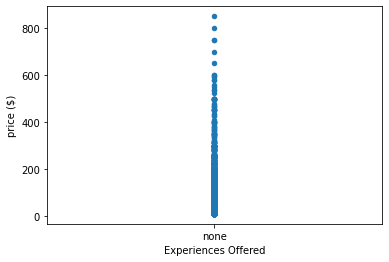

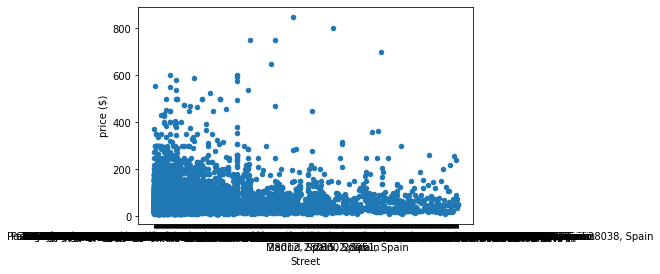

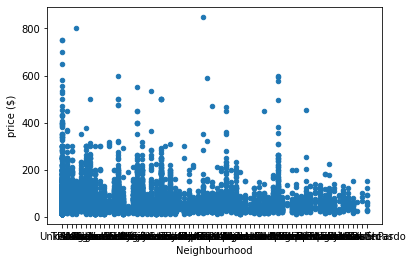

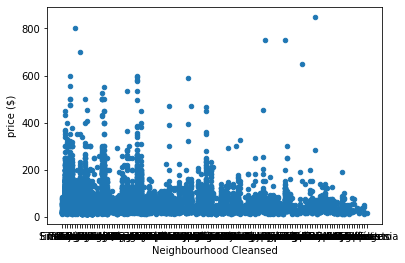

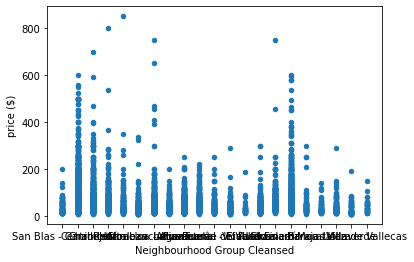

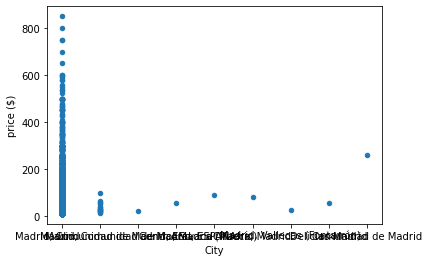

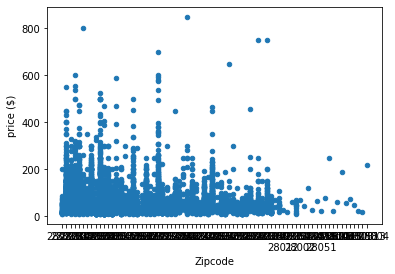

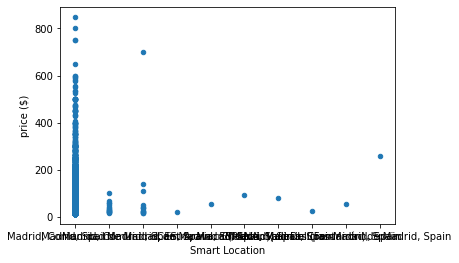

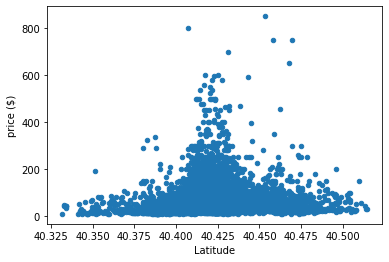

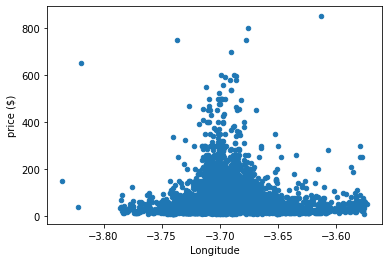

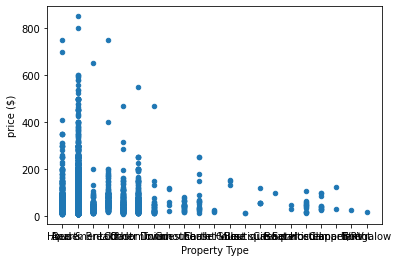

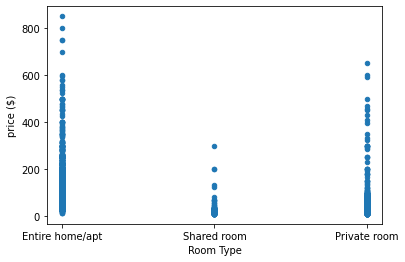

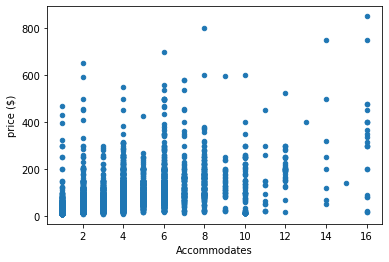

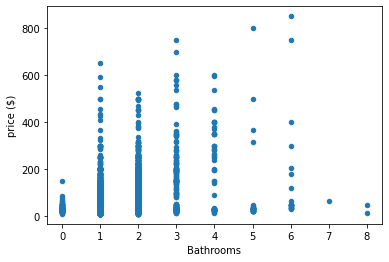

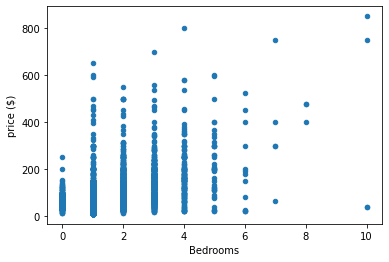

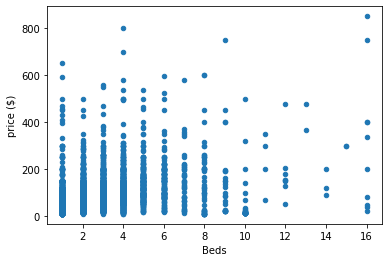

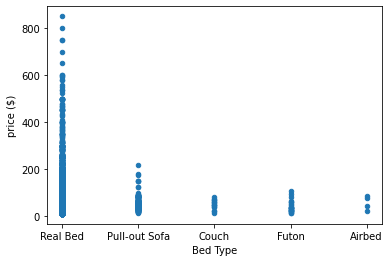

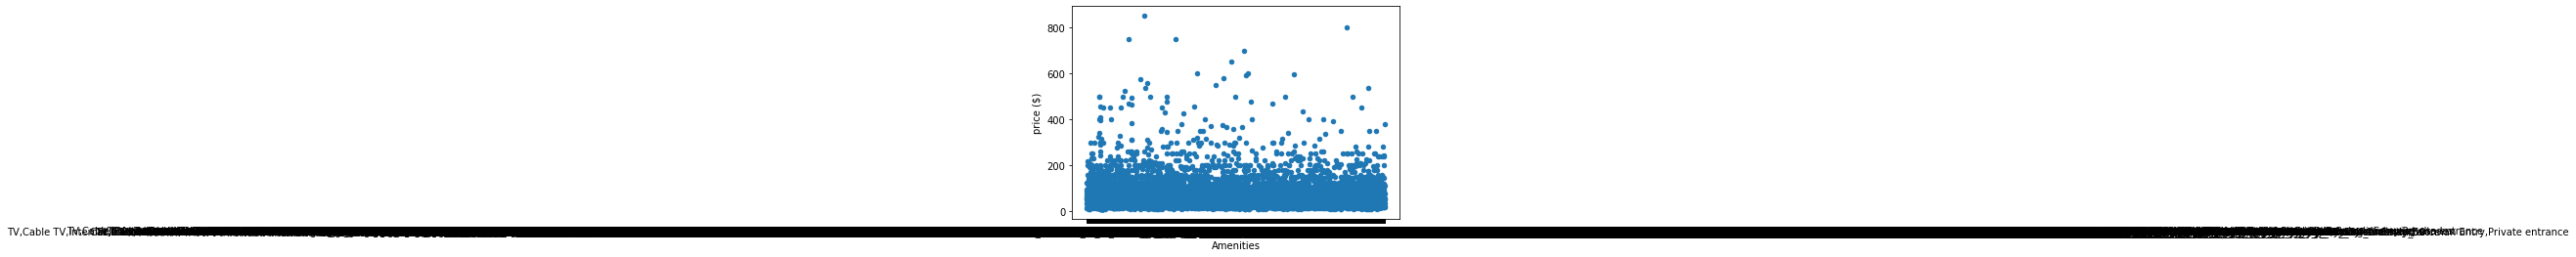

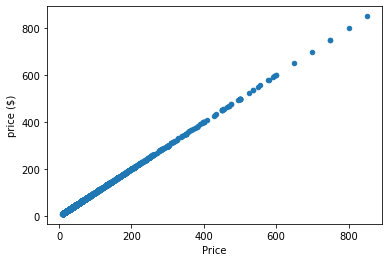

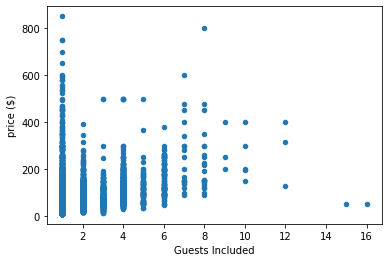

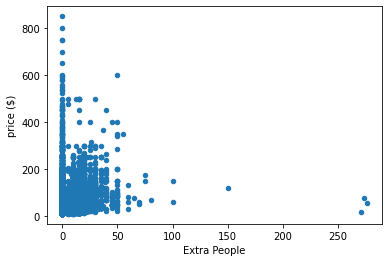

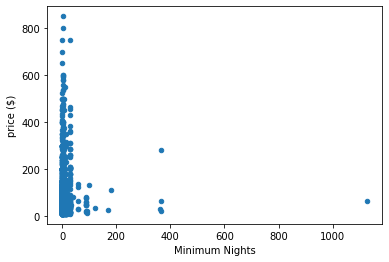

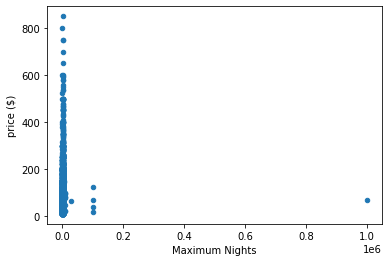

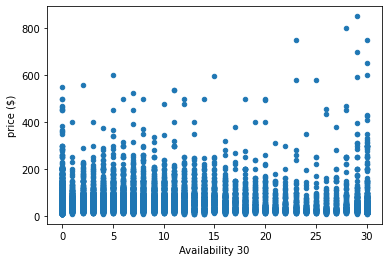

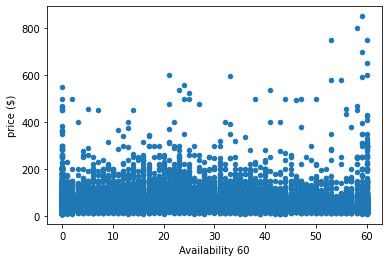

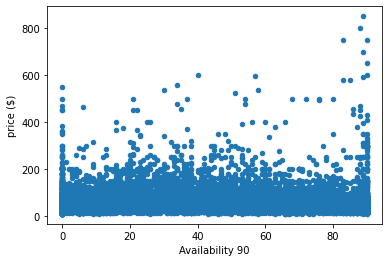

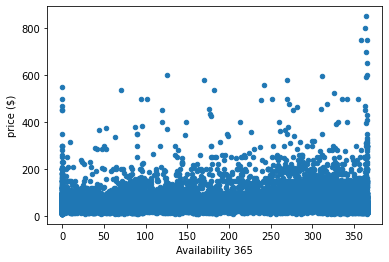

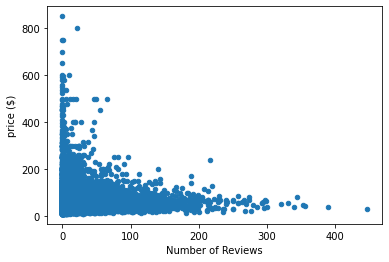

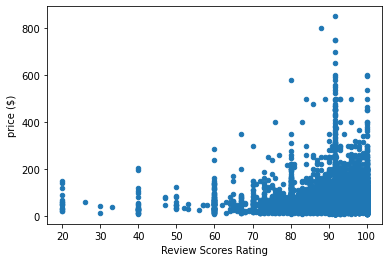

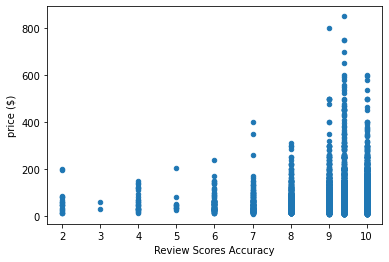

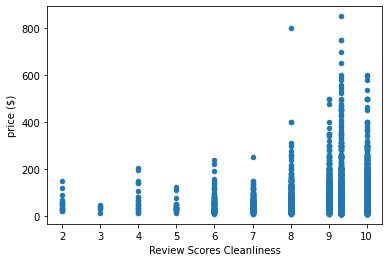

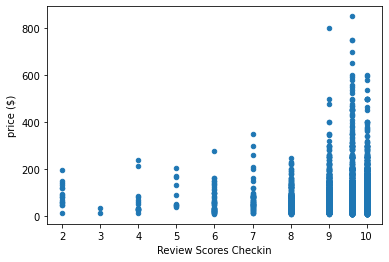

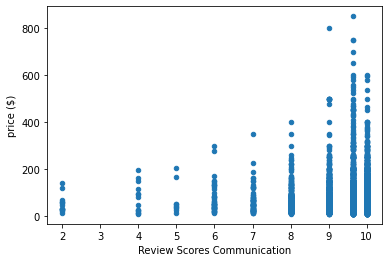

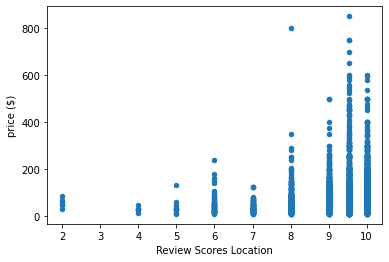

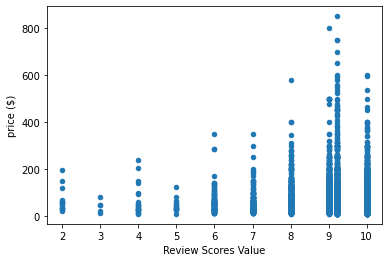

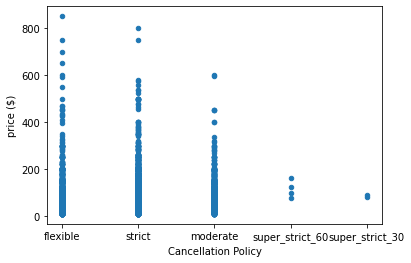

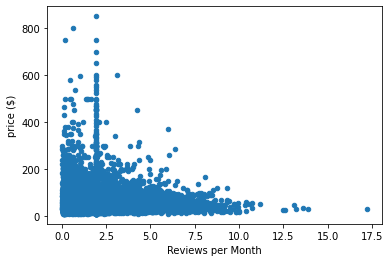

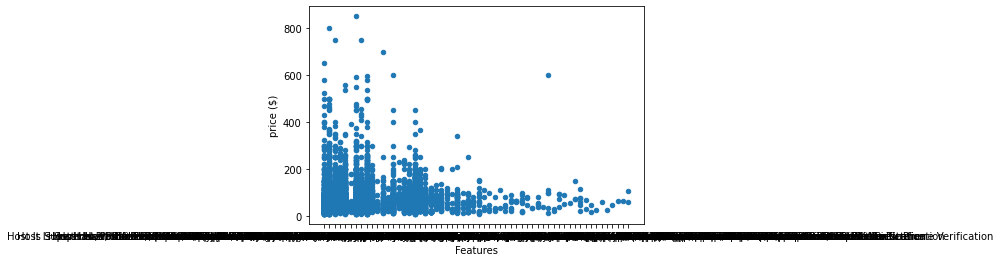

In [275]:
# Vamos a mirar con los plots outliners que se tengan que eliminar
df_plot = df_train
for column in df_plot.columns:
    df_plot.plot(kind = 'scatter',x=f'{column}',y = 'Price')
    plt.xlabel(column)
    plt.ylabel('price ($)')
    plt.show()

In [276]:
# Vamos a filtrar por varios elementos como el Price, Bathrooms y Bedrooms
df_train = df_train[df_train["Price"] <= 325]
df_train = df_train[df_train["Bathrooms"] <= 6]
df_train = df_train[df_train["Bedrooms"] <= 8]

In [277]:
df_train.head()

,Experiences Offered,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Zipcode,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features
0,none,"Madrid, Comunidad de Madrid 28037, Spain",Unknown,Simancas,San Blas - Canillejas,Madrid,28037,"Madrid, Spain",40.431655,-3.628847,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,Pets allowed,35.0,1,0,1,1125,9,39,69,344,0,91.625721,9.407225,9.330605,9.620993,9.644,9.543811,9.217307,flexible,1.923316,"Host Has Profile Pic,Requires License"
1,none,"Sol, Madrid, Comunidad de Madrid 28013, Spain",Sol,Sol,Centro,Madrid,28013,"Madrid, Spain",40.417019,-3.706064,Apartment,Entire home/apt,6,2.0,2.0,4.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",125.0,2,15,3,1125,6,15,22,226,8,95.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,strict,1.140000,"Host Has Profile Pic,Host Identity Verified,Is..."
2,none,"Madrid, Comunidad de Madrid 28037, Spain",Unknown,Simancas,San Blas - Canillejas,Madrid,28037,"Madrid, Spain",40.430342,-3.625955,Apartment,Shared room,4,1.0,1.0,4.0,Real Bed,"Internet,Wireless Internet,Free parking on pre...",13.0,1,13,1,1125,27,57,87,87,9,93.000000,9.000000,10.000000,9.000000,9.000,9.000000,9.000000,flexible,1.750000,"Host Has Profile Pic,Host Identity Verified,Re..."
3,none,"Trafalgar, Madrid, Comunidad de Madrid 28010, ...",Trafalgar,Trafalgar,Chamberí,Madrid,28010,"Madrid, Spain",40.437100,-3.703484,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",60.0,2,10,2,1125,0,0,5,267,22,98.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,moderate,1.900000,"Host Is Superhost,Host Has Profile Pic,Host Id..."
4,none,"Madrid, Comunidad de Madrid 28014, Spain",Unknown,Cortes,Centro,Madrid,28014,"Madrid, Spain",40.412314,-3.697892,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",124.0,1,0,3,1125,13,28,47,231,1,100.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,strict,0.180000,"Host Has Profile Pic,Host Identity Verified,Re..."


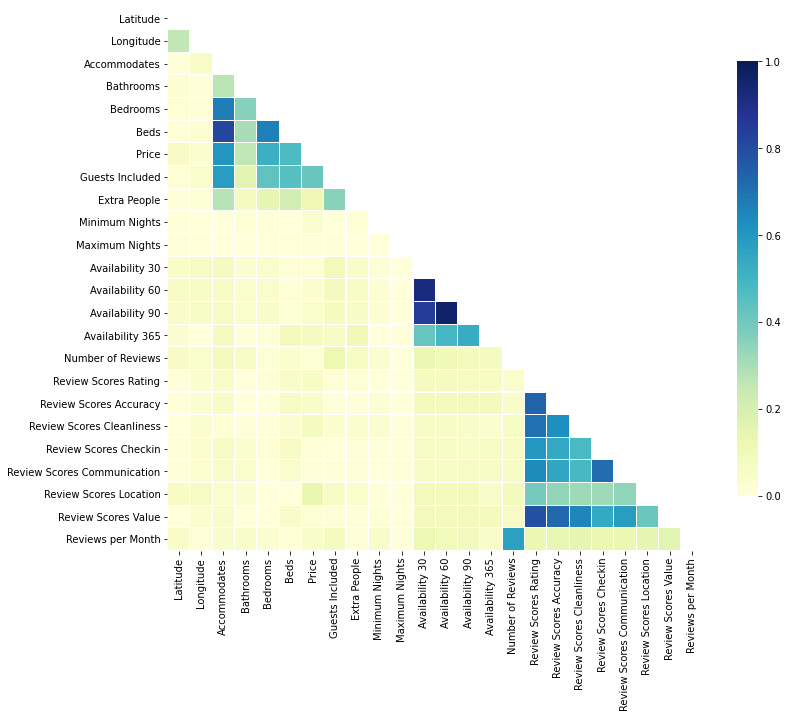

In [278]:
# Correlación para ver conexiones entre las diferentes variables 
import seaborn as sns

df_corr = df_train
corr = np.abs(df_corr.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap='YlGnBu', cbar_kws={'shrink': .8})

plt.show()

In [279]:
# Mirando la correlación vamos a eliminar más categorias
df_train = df_train.drop(['Availability 60', 'Availability 90', 'Beds'], axis=1)

In [280]:
df_train.corr()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month
Latitude,1.000000,0.261659,-0.005796,0.026087,0.016332,0.066123,-0.018419,0.011096,-0.009813,0.004177,0.052609,0.033664,-0.060231,0.004434,0.004747,-0.002380,0.007223,0.006385,0.054710,-0.002557,-0.053571
Longitude,0.261659,1.000000,-0.054351,0.008464,0.011117,-0.029661,-0.040775,-0.021194,-0.002595,-0.003195,0.064506,0.003520,-0.042530,0.037280,0.034295,0.036488,0.029955,0.024244,-0.072522,0.027951,-0.015338
Accommodates,-0.005796,-0.054351,1.000000,0.272618,0.670253,0.608068,0.583836,0.279584,-0.001819,0.002758,-0.077382,0.079691,0.089832,-0.051093,-0.058861,-0.021230,-0.063004,-0.050946,0.044638,-0.050435,0.047677
Bathrooms,0.026087,0.008464,0.272618,1.000000,0.360693,0.261817,0.156610,0.080852,0.017429,-0.003581,-0.034356,-0.006478,-0.060522,0.000151,-0.003351,-0.003911,-0.037622,-0.041162,0.031387,-0.002795,-0.048500
Bedrooms,0.016332,0.011117,0.670253,0.360693,1.000000,0.520307,0.435494,0.149018,0.010120,0.000931,-0.040086,0.023252,-0.023061,0.013538,0.001693,0.006978,-0.017154,-0.002780,0.003271,0.003593,-0.033426
Price,0.066123,-0.029661,0.608068,0.261817,0.520307,1.000000,0.418195,0.120587,0.027977,0.004305,-0.017508,0.079365,-0.019814,0.054923,0.050302,0.077188,-0.010984,0.005133,0.138075,0.020065,-0.048013
Guests Included,-0.018419,-0.040775,0.583836,0.156610,0.435494,0.418195,1.000000,0.357142,-0.000436,-0.004780,-0.100541,0.056525,0.126098,0.014861,0.011216,0.035994,0.003198,0.008761,0.057585,0.012051,0.077960
Extra People,0.011096,-0.021194,0.279584,0.080852,0.149018,0.120587,0.357142,1.000000,-0.020865,-0.002441,0.048453,0.106314,0.073065,0.021810,0.007028,0.031330,0.014837,0.013688,0.045569,0.009995,-0.012583
Minimum Nights,-0.009813,-0.002595,-0.001819,0.017429,0.010120,0.027977,-0.000436,-0.020865,1.000000,-0.000863,-0.019057,0.001269,-0.035697,0.003034,-0.023817,-0.035650,-0.004341,0.002474,0.005846,-0.020471,-0.049404
Maximum Nights,0.004177,-0.003195,0.002758,-0.003581,0.000931,0.004305,-0.004780,-0.002441,-0.000863,1.000000,0.001591,0.011605,-0.001355,0.001713,0.006162,0.006829,-0.008246,-0.009864,0.005161,-0.001845,-0.004440


In [281]:
# Vamos a ver como nos queda la tabla
df_train.head()

,Experiences Offered,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Zipcode,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features
0,none,"Madrid, Comunidad de Madrid 28037, Spain",Unknown,Simancas,San Blas - Canillejas,Madrid,28037,"Madrid, Spain",40.431655,-3.628847,House,Entire home/apt,2,1.0,1.0,Real Bed,Pets allowed,35.0,1,0,1,1125,9,344,0,91.625721,9.407225,9.330605,9.620993,9.644,9.543811,9.217307,flexible,1.923316,"Host Has Profile Pic,Requires License"
1,none,"Sol, Madrid, Comunidad de Madrid 28013, Spain",Sol,Sol,Centro,Madrid,28013,"Madrid, Spain",40.417019,-3.706064,Apartment,Entire home/apt,6,2.0,2.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",125.0,2,15,3,1125,6,226,8,95.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,strict,1.140000,"Host Has Profile Pic,Host Identity Verified,Is..."
2,none,"Madrid, Comunidad de Madrid 28037, Spain",Unknown,Simancas,San Blas - Canillejas,Madrid,28037,"Madrid, Spain",40.430342,-3.625955,Apartment,Shared room,4,1.0,1.0,Real Bed,"Internet,Wireless Internet,Free parking on pre...",13.0,1,13,1,1125,27,87,9,93.000000,9.000000,10.000000,9.000000,9.000,9.000000,9.000000,flexible,1.750000,"Host Has Profile Pic,Host Identity Verified,Re..."
3,none,"Trafalgar, Madrid, Comunidad de Madrid 28010, ...",Trafalgar,Trafalgar,Chamberí,Madrid,28010,"Madrid, Spain",40.437100,-3.703484,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",60.0,2,10,2,1125,0,267,22,98.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,moderate,1.900000,"Host Is Superhost,Host Has Profile Pic,Host Id..."
4,none,"Madrid, Comunidad de Madrid 28014, Spain",Unknown,Cortes,Centro,Madrid,28014,"Madrid, Spain",40.412314,-3.697892,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",124.0,1,0,3,1125,13,231,1,100.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,strict,0.180000,"Host Has Profile Pic,Host Identity Verified,Re..."


In [282]:
# Vamos a cambiar las columnas categóricas en númericas ya que si no no las podremos procesar
categ = ['Experiences Offered', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 
               'Zipcode', 'Smart Location', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Cancellation Policy', 
               'Features', 'City']
mean_map = {}

for c in categ:
  mean = df_train.groupby(c)['Price'].mean()
  df_train[c] = df_train[c].map(mean)
  mean_map[c] = mean

df_train.head()

,Experiences Offered,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Zipcode,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features
0,63.275876,30.619048,56.228264,36.857143,39.400000,63.300499,35.823529,63.322408,40.431655,-3.628847,53.388846,83.95136,2,1.0,1.0,63.508253,35.0,35.0,1,0,1,1125,9,344,0,91.625721,9.407225,9.330605,9.620993,9.644,9.543811,9.217307,54.821507,1.923316,51.646095
1,63.275876,80.450644,83.499118,82.541667,70.413416,63.300499,78.788098,63.322408,40.417019,-3.706064,65.120988,83.95136,6,2.0,2.0,63.508253,85.2,125.0,2,15,3,1125,6,226,8,95.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,71.784271,1.140000,61.957592
2,63.275876,30.619048,56.228264,36.857143,39.400000,63.300499,35.823529,63.322408,40.430342,-3.625955,65.120988,27.50000,4,1.0,1.0,63.508253,13.0,13.0,1,13,1,1125,27,87,9,93.000000,9.000000,10.000000,9.000000,9.000,9.000000,9.000000,54.821507,1.750000,55.826958
3,63.275876,80.366972,84.193548,80.987500,68.324281,63.300499,76.158784,63.322408,40.437100,-3.703484,65.120988,83.95136,4,1.0,1.0,63.508253,58.0,60.0,2,10,2,1125,0,267,22,98.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,61.412141,1.900000,73.698592
4,63.275876,73.775862,56.228264,78.083195,70.413416,63.300499,79.238659,63.322408,40.412314,-3.697892,65.120988,83.95136,2,1.0,1.0,63.508253,124.0,124.0,1,0,3,1125,13,231,1,100.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,71.784271,0.180000,64.962602


In [283]:
# Ponemos la columna al principio
def order_columns(dataframe):
    columns = []
    for column in dataframe.columns:
        if column == "Price":
            columns.insert(0, column)
        else:
            columns.append(column)
    dataframe = dataframe[columns]
    return dataframe

df = order_columns(df_train)
df.head()

,Price,Experiences Offered,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Zipcode,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features
0,35.0,63.275876,30.619048,56.228264,36.857143,39.400000,63.300499,35.823529,63.322408,40.431655,-3.628847,53.388846,83.95136,2,1.0,1.0,63.508253,35.0,1,0,1,1125,9,344,0,91.625721,9.407225,9.330605,9.620993,9.644,9.543811,9.217307,54.821507,1.923316,51.646095
1,125.0,63.275876,80.450644,83.499118,82.541667,70.413416,63.300499,78.788098,63.322408,40.417019,-3.706064,65.120988,83.95136,6,2.0,2.0,63.508253,85.2,2,15,3,1125,6,226,8,95.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,71.784271,1.140000,61.957592
2,13.0,63.275876,30.619048,56.228264,36.857143,39.400000,63.300499,35.823529,63.322408,40.430342,-3.625955,65.120988,27.50000,4,1.0,1.0,63.508253,13.0,1,13,1,1125,27,87,9,93.000000,9.000000,10.000000,9.000000,9.000,9.000000,9.000000,54.821507,1.750000,55.826958
3,60.0,63.275876,80.366972,84.193548,80.987500,68.324281,63.300499,76.158784,63.322408,40.437100,-3.703484,65.120988,83.95136,4,1.0,1.0,63.508253,58.0,2,10,2,1125,0,267,22,98.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,61.412141,1.900000,73.698592
4,124.0,63.275876,73.775862,56.228264,78.083195,70.413416,63.300499,79.238659,63.322408,40.412314,-3.697892,65.120988,83.95136,2,1.0,1.0,63.508253,124.0,1,0,3,1125,13,231,1,100.000000,10.000000,10.000000,10.000000,10.000,10.000000,10.000000,71.784271,0.180000,64.962602


###Random Forest en Train

In [284]:
# Primero vamos a probar en hacer este tipo de modelo con el train
from sklearn import preprocessing

data = df.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
x_train = data[:,1:]      # nos quedamos con el resto
feature_names = df.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

best mean cross-validation score: 0.889
best parameters: {'max_depth': 5}


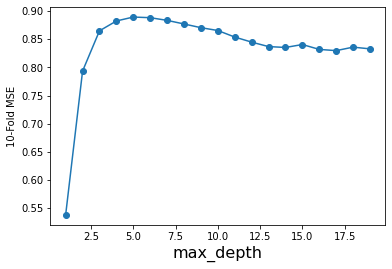

In [285]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(x_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [287]:
#Calculamos el score del modelo en un punto más de la pronfundidad que nos recomienda el anterior gráfico, ya que da más score
maxDepthOptimo = 6
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(x_train,y_train.ravel())

print("Train: ",bagModel.score(x_train,y_train))
# He intentado eliminar o añadir más categorías pero el resultado sigue siendo el mismo

Train:  0.8319838466369468


###LASSO en Train

best mean cross-validation score: -186.577
best parameters: {'alpha': 10.0}


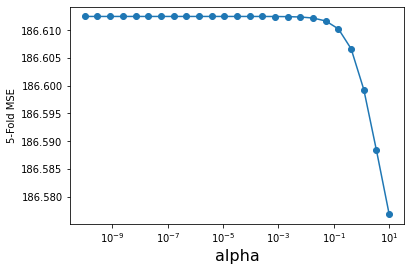

In [288]:
#Importamos las funciones relevantes:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

#Ejecutamos GridSearch para obtener los parámetros óptimos (alpha):
alpha_vector = np.logspace(-10,1,25)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=5)
grid.fit(x_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#Representamos los resultados:
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

###Boosted Tree

In [ ]:
# He intentado hacer esta regresion pero me sale cargando eternamente así que de momento lo descarto
#Importamos las funciones relevantes:
from sklearn.ensemble import GradientBoostingRegressor

#Determinamos los intervalos para iteraciones y Learning Rate:
Niterations = [1500, 2000, 2500]
learningRate = [0.1, 0.05]

#Ejecutamos GridSearch para obtener los parámetros óptimos del modelo (Learning Rate y Número de Estimadores)
param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(x_train, y_train.ravel())

#Imprimimos los resultados:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

##Creación de los tres modelos con el dataset Test

In [300]:
# Primero vamos a hacer el preprocesado de train en test
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

df_test1 = df_test[df_test['City'].str.contains("Madrid", na = False)]

df_test1 = df_test.drop(['Square Feet', 'Has Availability', 'License', 
                    'Jurisdiction Names', 'Weekly Price', 'Name',
                    'Monthly Price', 'ID', 'Listing Url', 'Summary',
                    'Scrape ID', 'Last Scraped', 'Thumbnail Url',
                    'Medium Url', 'Picture Url', 'XL Picture Url',
                    'Host ID', 'Host URL', 'Host Name', 'Host Since',
                    'Host Location', 'Host About','Host Response Time',
                    'Host Response Rate', 'Host Acceptance Rate',
                    'Host Thumbnail Url', 'Host Picture Url', 'Description',
                    'Host Neighbourhood', 'Host Listings Count', 'Space',
                    'Host Verifications', 'State', 'Country Code',
                    'Country', 'Calendar last Scraped', 'Neighborhood Overview',
                    'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
                    'Security Deposit', 'Cleaning Fee', 'Host Total Listings Count',
                    'Market', 'Calculated host listings count', 'First Review',
                    'Last Review', 'Calendar Updated', 'Geolocation'], axis=1)

values2 = {'Neighbourhood': 'Unknown', 'Neighbourhood Group Cleansed': 'Unknown', 'Zipcode': 'Unknown', 'Amenities': 'Unknown', 
          'Features': 'Unknown'}

def_test1 = df_test1.fillna(value=values2)

df_test1['Bathrooms'].fillna((df_test1['Bathrooms'].mean()), inplace=True)
df_test1['Bedrooms'].fillna((df_test1['Bedrooms'].mean()), inplace=True)
df_test1['Beds'].fillna((df_test1['Beds'].mean()), inplace=True)
df_test1['Review Scores Rating'].fillna((df_test1['Review Scores Rating'].mean()), inplace=True)
df_test1['Review Scores Accuracy'].fillna((df_test1['Review Scores Accuracy'].mean()), inplace=True)
df_test1['Review Scores Cleanliness'].fillna((df_test1['Review Scores Cleanliness'].mean()), inplace=True)
df_test1['Review Scores Checkin'].fillna((df_test1['Review Scores Checkin'].mean()), inplace=True)
df_test1['Review Scores Communication'].fillna((df_test1['Review Scores Communication'].mean()), inplace=True)
df_test1['Review Scores Location'].fillna((df_test1['Review Scores Location'].mean()), inplace=True)
df_test1['Review Scores Value'].fillna((df_test1['Review Scores Value'].mean()), inplace=True)
df_test1['Reviews per Month'].fillna((df_test1['Reviews per Month'].mean()), inplace=True)
df_test1['Reviews per Month'].fillna((df_test1['Reviews per Month'].mean()), inplace=True)

df_test1 = df_test1.dropna()

df_test1.isna().sum()

Experiences Offered             0
Street                          0
Neighbourhood                   0
Neighbourhood Cleansed          0
Neighbourhood Group Cleansed    0
City                            0
Zipcode                         0
Smart Location                  0
Latitude                        0
Longitude                       0
Property Type                   0
Room Type                       0
Accommodates                    0
Bathrooms                       0
Bedrooms                        0
Beds                            0
Bed Type                        0
Amenities                       0
Price                           0
Guests Included                 0
Extra People                    0
Minimum Nights                  0
Maximum Nights                  0
Availability 30                 0
Availability 60                 0
Availability 90                 0
Availability 365                0
Number of Reviews               0
Review Scores Rating            0
Review Scores 

In [301]:
df_test1.Bathrooms = df_test1.Bathrooms.round()
df_test1.Bedrooms = df_test1.Bedrooms.round()

df_test1 = df_test1[df_test1["Price"] <= 325]
df_test1 = df_test1[df_test1["Bathrooms"] <= 6]
df_test1 = df_test1[df_test1["Bedrooms"] <= 8]

df_test1 = order_columns(df_test1)
df_test1.head()

,Price,Experiences Offered,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Zipcode,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features
1,75.0,none,"La Latina, Madrid, Comunidad de Madrid 28005, ...",La Latina,Palacio,Centro,Madrid,28005,"Madrid, Spain",40.411957,-3.712639,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",1,20,1,2,2,4,12,59,0,91.646187,9.419467,9.311955,9.634178,9.650676,9.531701,9.196413,strict,1.875546,"Host Has Profile Pic,Host Identity Verified,Is..."
2,156.0,none,"Palacio, Madrid, Comunidad de Madrid 28005, Spain",Palacio,Palacio,Centro,Madrid,28005,"Madrid, Spain",40.413576,-3.711564,Apartment,Entire home/apt,6,2.0,2.0,4.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",2,18,2,1125,2,9,14,257,18,96.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,strict,2.660000,"Host Is Superhost,Host Has Profile Pic,Host Id..."
6,30.0,none,"Delicias, Madrid, Comunidad de Madrid 28045, S...",Delicias,Delicias,Arganzuela,Madrid,28045,"Madrid, Spain",40.396052,-3.695031,Bed & Breakfast,Private room,3,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Air conditioning,Doorman,...",2,10,3,1125,15,45,72,94,60,91.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,strict,2.110000,"Host Has Profile Pic,Host Identity Verified,Is..."
7,150.0,none,"Palacio, Madrid, Community of Madrid 28013, Spain",Palacio,Palacio,Centro,Madrid,28013,"Madrid, Spain",40.418140,-3.709831,Apartment,Entire home/apt,8,2.0,3.0,6.0,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",4,9,3,1125,4,18,32,290,44,91.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,moderate,1.440000,"Host Has Profile Pic,Is Location Exact,Require..."
8,200.0,none,"Embajadores, Madrid, Comunidad de Madrid 28012...",Embajadores,Embajadores,Centro,Madrid,28012,"Madrid, Spain",40.411254,-3.703448,Apartment,Entire home/apt,8,2.0,4.0,6.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",4,20,2,1125,0,4,30,301,3,93.000000,10.000000,9.000000,10.000000,9.000000,9.000000,9.000000,strict,0.170000,"Host Has Profile Pic,Is Location Exact,Require..."


In [302]:
df_test1 = df_test1.drop(['Availability 60', 'Availability 90', 'Beds'], axis=1)

categorical2 = ['Experiences Offered', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 
               'Zipcode', 'Smart Location', 'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Cancellation Policy', 
               'Features', 'City']

mean_map = {}

for c in categorical2:
    mean = df_test1.groupby(c)['Price'].mean()
    df_test1[c] = df_test1[c].map(mean)  
    mean_map[c] = mean

# Ponemos la columna al principio
def order_columns(dataframe):
    columns = []
    for column in dataframe.columns:
        if column == "Price":
            columns.insert(0, column)
        else:
            columns.append(column)
    dataframe = dataframe[columns]
    return dataframe
    
#Verificamos el resultado:    
df_test1.head()

,Price,Experiences Offered,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,Zipcode,Smart Location,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Reviews per Month,Features
1,75.0,67.964602,69.160920,69.341772,78.375000,73.184748,66.23942,70.078431,66.267401,40.411957,-3.712639,70.105541,34.862013,2,1.0,1.0,68.263605,75.000000,1,20,1,2,2,59,0,91.646187,9.419467,9.311955,9.634178,9.650676,9.531701,9.196413,78.041152,1.875546,64.929545
2,156.0,67.964602,73.714286,84.320000,78.375000,73.184748,66.23942,70.078431,66.267401,40.413576,-3.711564,70.105541,86.205304,6,2.0,2.0,68.263605,156.000000,2,18,2,1125,2,257,18,96.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,78.041152,2.660000,74.224490
6,30.0,67.964602,33.300000,33.300000,33.300000,50.600000,66.23942,45.375000,66.267401,40.396052,-3.695031,36.595238,34.862013,3,1.0,1.0,68.263605,30.000000,2,10,3,1125,15,94,60,91.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,78.041152,2.110000,64.929545
7,150.0,67.964602,78.600000,84.320000,78.375000,73.184748,66.23942,84.275168,66.267401,40.418140,-3.709831,70.105541,86.205304,8,2.0,3.0,68.263605,150.000000,4,9,3,1125,4,290,44,91.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,63.672447,1.440000,69.398268
8,200.0,67.964602,62.894737,63.176101,63.535565,73.184748,66.23942,70.501730,66.267401,40.411254,-3.703448,70.105541,86.205304,8,2.0,4.0,68.263605,157.857143,4,20,2,1125,0,301,3,93.000000,10.000000,9.000000,10.000000,9.000000,9.000000,9.000000,78.041152,0.170000,69.398268


##Random Forest en el dataset Test

In [303]:
data_test = df_test1.values 
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
x_test = data_test[:,1:]

In [304]:

maxDepthOptimo = 6 #Parámetro óptimo según GridSearch
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(x_train,y_train)

print("Train: ",bagModel.score(x_train,y_train))
print("Test: ",bagModel.score(x_test,y_test))

Train:  0.8361585597197303
Test:  0.8592225306932852


In [308]:
from sklearn.metrics import mean_squared_error
MSE_RF = mean_squared_error(y_test, bagModel.predict(x_test))
print("MSE de Random Forest: ", round(MSE_RF,2))

MSE de Random Forest:  274.03


## LASSO en Test

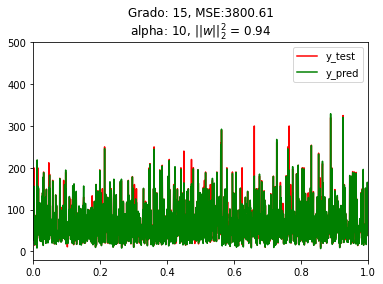

w1:  0.0
w2:  0.06594652394133504
w3:  0.0
w4:  0.0
w5:  -0.0
w6:  0.0
w7:  0.0
w8:  0.0
w9:  0.0
w10:  0.0
w11:  0.0
w12:  0.035944983430957235
w13:  0.0
w14:  0.0
w15:  0.0
MSE de LASSO:  3800.61


In [306]:
from sklearn.linear_model import Lasso

N_test  = len(y_test)
x = np.linspace(0,1,N_test)
degree = 15

a = 10 #Parámetro óptimo según GridSearch
lasso = Lasso(alpha=a).fit(x_train,y_train)
w = lasso.coef_
norm_w2 = np.dot(w,w.T)
    
y_hat = lasso.predict(x_test)

error_test = np.mean(np.power(y_test - y_hat,2)) 

plt.plot(x,y_test,'r',label='y_test')
plt.plot(x,y_hat,'g',label='y_pred')
plt.title('Grado: %i, MSE:%.2f\nalpha: %g, $||w||_2^2$ = %.2g'%(degree,error_test,a,norm_w2))
plt.legend()
plt.xlim((0, 1))
plt.ylim((-20, 500))
plt.show()

coef_names = ['w' + str(i) + ': ' for i in range(1,degree+1)]

for f,wi in zip(coef_names,w):
    print(f,wi)
    
print("MSE de LASSO: ", round(error_test,2))

In [310]:
print("MSE de LASSO: ", round(error_test,2))

MSE de LASSO:  3800.61


#Conclusión
Podemos ver que si comparamos ambos modelos (Random Forest y LASSO) podemos comprobar que Random Forest tiene menor error cuadrático y, por lo tanto, es el modelo adecuada para poder predecir los precios de los alojamientos. Cabe también recalcar que se ha intentado usar Boosted Tree, sin embargo se queda loading durante demasiado tiempo, dificultando las labores de crear el modelo. Es el caso de usar google collab, puede que probando el modelo en otro sitio quizás se pueda conseguir el objetivo deseado.